<h2 align="center">Automatic Machine Learning with H2O AutoML</h2>

### Importing Packages

In [1]:
import pandas as pd
pd.options.display.max_rows = 999
import numpy as np
import matplotlib.pyplot as plt

### Loading and Exploring the Data

In [2]:
sheet = pd.ExcelFile("data/bank_term_deposit_marketing_analysis.xlsx")

In [3]:
sheet.sheet_names

['PROCEDURE',
 'DATA DESCRIPTION',
 'Step 1 - Collect Information',
 'CLIENT_INFO',
 'LOAN_HISTORY',
 'MARKETING HISTORY',
 'SUBSCRIPTION HISTORY',
 'Step 2 - Merge Information',
 'CLIENT_MERGE',
 'Step 3 - Marketing Analysis',
 'DAILY RANGE',
 'JOB ANALYSIS',
 'Sheet3']

In [4]:
client_info = pd.read_excel(sheet,'CLIENT_INFO')
loan_history = pd.read_excel(sheet,'LOAN_HISTORY')
marketing_history = pd.read_excel(sheet,'MARKETING HISTORY')
sub_history = pd.read_excel(sheet,'SUBSCRIPTION HISTORY')

In [8]:
client_info.head(10)

,ID,AGE,JOB,MARITAL,EDUCATION
0,2836,58,management,married,tertiary
1,2837,44,technician,single,secondary
2,2838,33,entrepreneur,married,secondary
3,2839,47,blue-collar,married,unknown
4,2840,33,unknown,single,unknown
5,2841,35,management,married,tertiary
6,2842,28,management,single,tertiary
7,2843,42,entrepreneur,divorced,tertiary
8,2844,58,retired,married,primary
9,2845,43,technician,single,secondary


In [9]:
loan_history.head(10)

,ID,DEFAULT,BALANCE,HOUSING,LOAN
0,2836,no,2143,yes,no
1,2837,no,29,yes,no
2,2838,no,2,yes,yes
3,2839,no,1506,yes,no
4,2840,no,1,no,no
5,2841,no,231,yes,no
6,2842,no,447,yes,yes
7,2843,yes,2,yes,no
8,2844,no,121,yes,no
9,2845,no,593,yes,no


In [10]:
marketing_history.head(10)

,ID,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME
0,2836,unknown,5,may,261,1,-1,0,unknown
1,2837,unknown,5,may,151,1,-1,0,unknown
2,2838,unknown,5,may,76,1,-1,0,unknown
3,2839,unknown,5,may,92,1,-1,0,unknown
4,2840,unknown,5,may,198,1,-1,0,unknown
5,2841,unknown,5,may,139,1,-1,0,unknown
6,2842,unknown,5,may,217,1,-1,0,unknown
7,2843,unknown,5,may,380,1,-1,0,unknown
8,2844,unknown,5,may,50,1,-1,0,unknown
9,2845,unknown,5,may,55,1,-1,0,unknown


In [11]:
sub_history.head(10)

,ID,TERM_DEPOSIT
0,2836,no
1,2837,no
2,2838,no
3,2839,no
4,2840,no
5,2841,no
6,2842,no
7,2843,no
8,2844,no
9,2845,no


In [30]:
df = pd.merge(client_info, loan_history, on=['ID'])
sheet_names = [marketing_history, sub_history]
for sheet in sheet_names:
    df = df.merge(sheet, on=['ID'])
df.head(10)

,ID,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
0,2836,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2837,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,2838,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,2839,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,2840,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,2841,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,2842,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,2843,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,2844,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,2845,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [32]:
df = df.drop(['ID'], axis=1)
df.head(10)

,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


### Data Prep & Start H2O

In [34]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.7" 2020-04-14; OpenJDK Runtime Environment (build 11.0.7+10-post-Ubuntu-2ubuntu218.04); OpenJDK 64-Bit Server VM (build 11.0.7+10-post-Ubuntu-2ubuntu218.04, mixed mode, sharing)
  Starting server from /home/rhyme/.local/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpup7eq4ex
  JVM stdout: /tmp/tmpup7eq4ex/h2o_rhyme_started_from_python.out
  JVM stderr: /tmp/tmpup7eq4ex/h2o_rhyme_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,25 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.3
H2O_cluster_version_age:,"3 years, 11 months and 19 days !!!"
H2O_cluster_name:,H2O_from_python_rhyme_0d5o7w
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.920 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [35]:
h2o_df = h2o.H2OFrame(df)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [38]:
h2o_df.describe()

Rows:45211
Cols:17




,AGE,JOB,MARITAL,EDUCATION,DEFAULT,BALANCE,HOUSING,LOAN,CONTACT,DAY,MONTH,DURATION,CAMPAIGN,PDAYS,PREVIOUS,POUTCOME,TERM_DEPOSIT
type,int,enum,enum,enum,enum,int,enum,enum,enum,int,enum,int,int,int,int,enum,enum
mins,18.0,,,,,-8019.0,,,,1.0,,0.0,1.0,-1.0,0.0,,
mean,40.93621021432807,,,,,1362.2720576850802,,,,15.806418791886923,,258.16307978146915,2.7638406582468997,40.19782796222158,0.5803233726305561,,
maxs,95.0,,,,,102127.0,,,,31.0,,4918.0,63.0,871.0,275.0,,
sigma,10.618762040975398,,,,,3044.7658291685216,,,,8.32247615304459,,257.52781226517124,3.0980208832791805,100.12874599059822,2.303441044931215,,
zeros,0,,,,,3514,,,,0,,3,0,0,36954,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,58.0,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no


In [39]:
train, test = h2o_df.split_frame(ratios=[.75])

x = train.columns
y = 'TERM_DEPOSIT'
x.remove(y)

### Run H2O AutoML

In [42]:
from h2o.automl import H2OAutoML

In [44]:
autoML = H2OAutoML(max_runtime_secs = 600,
               balance_classes = True,
               stopping_metric = 'logloss',
               project_name='Final',
               seed=1)

%time autoML.train(x=x, y=y, training_frame=train)

AutoML progress: |████████████████████████████████████████████████████████| 100%
CPU times: user 1min 11s, sys: 1.1 s, total: 1min 12s
Wall time: 10min 9s


### AutoML Leaderboard and Ensemble Exploration

In [45]:
leaderboard = autoML.leaderboard
leaderboard.head(rows=leaderboard.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_AutoML_20240503_185911,0.933718,0.221588,0.621971,0.180221,0.256842,0.0659678
XGBoost_grid__1_AutoML_20240503_185911_model_2,0.93254,0.201989,0.617322,0.170707,0.251651,0.063328
StackedEnsemble_AllModels_AutoML_20240503_185911,0.931864,0.21442,0.614274,0.172817,0.254977,0.0650131
GBM_grid__1_AutoML_20240503_185911_model_2,0.930787,0.210164,0.607436,0.169596,0.257567,0.0663408
GBM_grid__1_AutoML_20240503_185911_model_1,0.930291,0.204132,0.606614,0.180571,0.253408,0.0642155
XGBoost_grid__1_AutoML_20240503_185911_model_1,0.929502,0.206932,0.601938,0.167081,0.255064,0.0650574
XGBoost_3_AutoML_20240503_185911,0.928627,0.207397,0.608727,0.186076,0.253895,0.0644629
XGBoost_grid__1_AutoML_20240503_185911_model_5,0.928514,0.208858,0.608834,0.184218,0.253955,0.064493
GBM_5_AutoML_20240503_185911,0.926742,0.247678,0.586077,0.176054,0.279362,0.078043
XGBoost_grid__1_AutoML_20240503_185911_model_3,0.926094,0.214813,0.588199,0.175041,0.260327,0.0677699


In [46]:
best_model = autoML.leader
metalearner = h2o.get_model(best_model.metalearner()['name'])

In [47]:
metalearner.varimp()

[('XGBoost_grid__1_AutoML_20240503_185911_model_2',
  0.8220707068917723,
  1.0,
  0.5560139517114141),
 ('GBM_grid__1_AutoML_20240503_185911_model_2',
  0.5105334530245439,
  0.6210335056881633,
  0.3453032936428686),
 ('DeepLearning_grid__3_AutoML_20240503_185911_model_1',
  0.14590317674571185,
  0.17748251521741715,
  0.0986827546457173),
 ('GLM_1_AutoML_20240503_185911', 0.0, 0.0, 0.0),
 ('XRT_1_AutoML_20240503_185911', 0.0, 0.0, 0.0),
 ('DRF_1_AutoML_20240503_185911', 0.0, 0.0, 0.0)]

### Base Learner XGBoost Model Exploration

In [49]:
model = h2o.get_model('XGBoost_grid__1_AutoML_20240503_185911_model_2')

In [50]:
model.model_performance(test)


ModelMetricsBinomial: xgboost
** Reported on test data. **

MSE: 0.06019077147161122
RMSE: 0.24533807587003534
LogLoss: 0.1913183733343102
Mean Per-Class Error: 0.11983301250875211
AUC: 0.9386068927701428
AUCPR: 0.6381891180319951
Gini: 0.8772137855402855

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3148131455693926: 


,,no,yes,Error,Rate
0,no,9283.0,670.0,0.0673,(670.0/9953.0)
1,yes,390.0,893.0,0.304,(390.0/1283.0)
2,Total,9673.0,1563.0,0.0943,(1060.0/11236.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.314813,0.627547,203.0
1,max f2,0.117193,0.746430,292.0
2,max f0point5,0.529894,0.619202,126.0
3,max accuracy,0.536020,0.913403,124.0
4,max precision,0.980473,1.000000,0.0
5,max recall,0.001007,1.000000,397.0
6,max specificity,0.980473,1.000000,0.0
7,max absolute_mcc,0.185240,0.578701,257.0
8,max min_per_class_accuracy,0.150325,0.869836,274.0
9,max mean_per_class_accuracy,0.097029,0.880167,304.0



Gains/Lift Table: Avg response rate: 11.42 %, avg score: 11.52 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.010057,0.884032,7.362584,7.362584,0.840708,0.924169,0.840708,0.924169,0.074045,0.074045,636.258355,636.258355
1,,2,0.020025,0.813780,6.646392,7.006080,0.758929,0.848831,0.800000,0.886667,0.066251,0.140296,564.639238,600.607950
2,,3,0.030082,0.753073,5.890067,6.632975,0.672566,0.783570,0.757396,0.852200,0.059236,0.199532,489.006684,563.297468
3,,4,0.040050,0.687788,5.864464,6.441701,0.669643,0.716655,0.735556,0.818464,0.058457,0.257989,486.446387,544.170087
4,,5,0.050018,0.639938,5.864464,6.326664,0.669643,0.662718,0.722420,0.787426,0.058457,0.316446,486.446387,532.666432
5,,6,0.100036,0.431360,4.752790,5.539727,0.542705,0.530936,0.632562,0.659181,0.237724,0.554170,375.278970,453.972701
6,,7,0.150053,0.283142,3.303578,4.794344,0.377224,0.352255,0.547450,0.556872,0.165238,0.719408,230.357841,379.434414
7,,8,0.200071,0.175519,2.430935,4.203492,0.277580,0.223631,0.479982,0.473562,0.121590,0.840998,143.093506,320.349187
8,,9,0.300018,0.065885,1.154163,3.187652,0.131790,0.110821,0.363987,0.352720,0.115355,0.956352,15.416270,218.765186
9,,10,0.400053,0.030859,0.272701,2.458752,0.031139,0.045262,0.280756,0.275838,0.027280,0.983632,-72.729895,145.875204


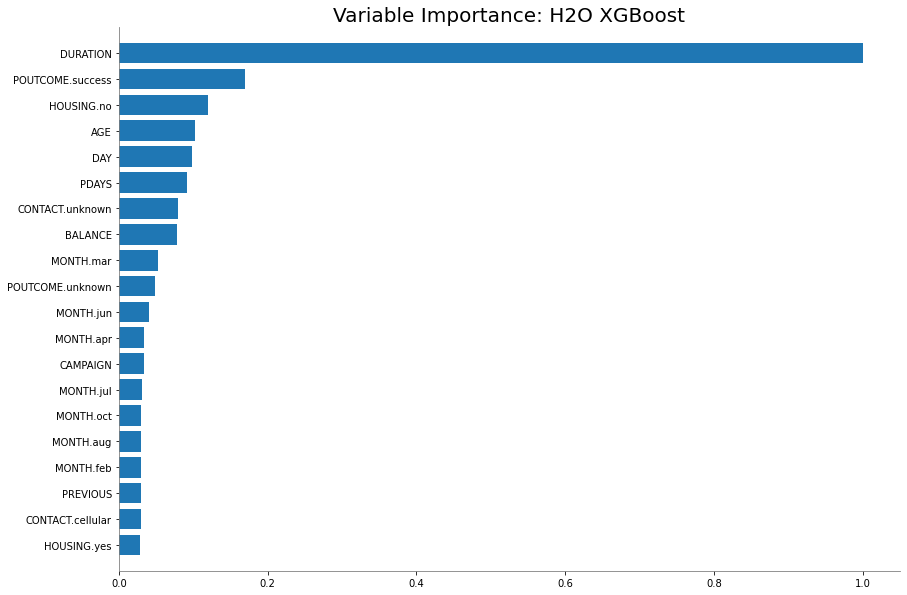

In [53]:
model.varimp_plot(num_of_features=20)